# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Павлов Евгений. Вариант №13

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения

**Диада** - элемент сети, представляющий собой пару акторов и (возможную) связь между ними
$$D_{ij}=(X_{ij}, X_{ji}), i \neq j$$

Виды диад:
- **Взаимная диада**: $D_{ij}=(1, 1)$
- **Асимметричная диада**: $D_{ij}=(1, 0), D_{ij}=(0, 1)$
- **Нулевая диада**: $D_{ij}=(0, 0)$

**Цензус диад** - тройка чисел <M, A, N>, где:

- $M=\sum_{i<g}X_{ij}X_{ji}$ - количество взаимных диад

- $A=X_{++}-2M$ - количество асимметричных диад

- $N=\binom{g}{2} - A - M$ - количество нулевых диад

**Индекс взаимности Каца-Пауэлла** - характеристика измерения тенденции акторов в группе:
$$-\inf<p_{KP}\leq1$$
Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом.

**Фиксированный выбор**:
- Предполагается, что каждый актор делает d выборов из (g-1) акторов, доступных для выбора
- Оценка $\rho_{KP}$ по методу моментов:
$$\hat{\rho_{KP}} = \frac {2(g-1)M-gd^{2}}{gd(g-1-d)}$$

**Свободный выбор**:
- i-й актор выбирает $d_O(n_i)=x_{i+}$ акторов
- Пусть $L=\sum x_{i+}, L_2=\sum x_{i+}^2$
- Оценка $\rho_{KP}$ по методу моментов:
$$\hat{\rho_{KP}} = \frac {2(g-1)^2M-L^2+L_2}{L(g-1)^2-L^2+L_2}$$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [ ]:
install.packages('sna')
install.packages('igraph')

In [ ]:
library(igraph)
library(sna)

1. Смоделирован случайный орграф $\mathscr{G}_{d}$ на основе модели Эрдеша—Реньи: $\mathscr{G}_{d}=\mathscr{G}(g, p)$, где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами.

Вариант 13: g=84, p=0.68

In [25]:
g <- 84
p <- 0.68
p0 <- 0.74
alpha <- 0.01
R <- sample_gnp(g, p, directed=TRUE)
G <- erdos.renyi.game(g, p, type= "gnp",  directed = TRUE)
X <- as_adjacency_matrix(G, sparse=FALSE)

Модель Эрдёша — Реньи — это модель генерации случайных графов, в которой граф строится путем добавления очередного ребра с вероятностью p. Все ребра добавляются независимо друг от друга. В данной модели все графы с n узлами и M ребрами имеют одинаковую вероятность $p^{M}(1-p)^{\binom{1}{2}-M}$

2. Полученный граф отображен.

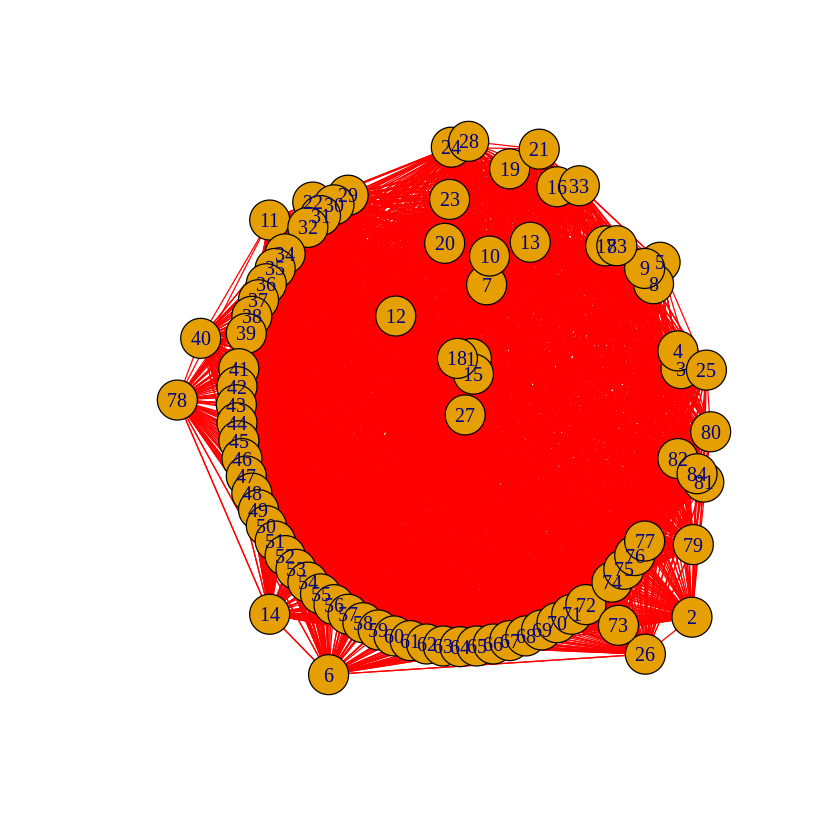

In [26]:
plot(G, edge.arrow.size=0.02, edge.color = "red", layout = layout.kamada.kawai(G))

3. Вычислена пятичисловая сводка для графа.

In [27]:
net <- as.network(as.matrix(G, "edgelist"), directed=TRUE)

print(paste('Размер сети:', network.size(net)))
print(paste('Плотность сети:', gden(net, mode="graph")))
print(paste('Компоненты сети:', components(net)))

geoDistances <- geodist(net)
print(paste('Диаметр: ', max(geoDistances$gdist)))

print(paste('Коэффициент кластеризации: ', gtrans(net, mode = "graph")))

[1] "Размер сети: 84"
[1] "Плотность сети: 0.681870338496845"
[1] "Компоненты сети: 1"
[1] "Диаметр:  2"
[1] "Коэффициент кластеризации:  0.682856208142652"


4. Вычислен цензус диад.

In [28]:
census <- dyad_census(G)
print(paste('M:', census$mut))
print(paste('A:', census$asym))
print(paste('N:', census$null))

[1] "M: 1635"
[1] "A: 1484"
[1] "N: 367"


Большинство акторов имеют связь

5. Вычислена оценка индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе.

In [47]:
M <- dyad_census(G)$mut
d <- floor(g / 2)
result_fix <- (2*(g-1)*M - g*d*d)/(g*d*(g-1-d))
cat("при фиксированом наборе:", result_fix)

при фиксированом наборе: -0.006768595

In [49]:
M <- dyad_census(G)$mut
L <- sum(X)
L_2 <- L # 1 ^ 2 = 1
result_free <- (2*(g-1)^2*M-L^2+L_2)/(L*(g-1)^2-L^2+L_2)
cat("при свободном выборе", result_free)

при свободном выборе -0.006768595

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

In [50]:
Pr_fix <- d/(g - 1) * (d/(g - 1) + result_fix * (g - 1 - d)/(g - 1))
Pr_fix

Pr_free <- d/(g - 1) * (d/(g - 1) + result_free * (g - 1 - d)/(g - 1))
Pr_free

[1] 0.4690189

[1] 0.2543685

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [31]:
reciprocity(G)
grecip(net, measure = "edgewise")

[1] 0.6878418

Mut 
0.6878418

Значение индекса близко к заданной вероятности возникновения связи

8. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается

In [32]:
n <- g*(g - 1)

Z_score <- abs((sum(X) - n*p))/sqrt(n*p*(1-p))
Z_score

[1] 0.3347877

9. Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе $G_{d}$
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), $p_{0}$) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается.

In [35]:
Z_score_2 <- (sum(X) - p0 * g * (g - 1))/sqrt(p0 * (1-p0) * g * (g - 1))
Z_score_2

[1] -11.06557

10. Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы.

In [36]:
p_cap <- sum(X)/(g*(g-1))
p_lower <- p_cap - alpha * sqrt(p_cap * (1 - p_cap)/(g*(g-1)))
p_upper <- p_cap + alpha * sqrt(p_cap * (1 - p_cap)/(g*(g-1)))
cat('с вероятностью 99% интервал от ', p_lower, ' до ', p_upper, ' накрывает истинное значение параметра p')

с вероятностью 99% интервал от  0.6818146  до  0.6819261  накрывает истинное значение параметра p

Полученный интервал близок к истинному значению p

## Выводы

В ходе выполнения практической работы был сгенерирован случайный ориентированный граф, а также рассчитан набор "оценок" для вероятности p(возникновение связи): индекс взаимности, доверительный интервал